### Assignment 1

#### Digit Recognition (MNIST)

#### Data preparation

In [1]:
import scipy.io

filename = "mnist_all.mat"

mat = scipy.io.loadmat(filename)
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'train0', 'test0', 'train1', 'test1', 'train2', 'test2', 'train3', 'test3', 'train4', 'test4', 'train5', 'test5', 'train6', 'test6', 'train7', 'test7', 'train8', 'test8', 'train9', 'test9'])

In [2]:
print(mat["train1"].shape)
print(mat["train2"].shape)
print(mat["train3"].shape)
print(mat["train4"].shape)
print(mat["train5"].shape)
print(mat["train6"].shape)
print(mat["train7"].shape)
print(mat["train8"].shape)
print(mat["train9"].shape)

print(mat["test0"].shape)
print(mat["test1"].shape)
print(mat["test2"].shape)
print(mat["test3"].shape)
print(mat["test4"].shape)
print(mat["test5"].shape)
print(mat["test6"].shape)
print(mat["test7"].shape)
print(mat["test8"].shape)
print(mat["test9"].shape)

print(mat["train1"][0].shape)

(6742, 784)
(5958, 784)
(6131, 784)
(5842, 784)
(5421, 784)
(5918, 784)
(6265, 784)
(5851, 784)
(5949, 784)
(980, 784)
(1135, 784)
(1032, 784)
(1010, 784)
(982, 784)
(892, 784)
(958, 784)
(1028, 784)
(974, 784)
(1009, 784)
(784,)


In [3]:
from data_preprocessing_utils import create_train_test_datasets_mnist

data = mat.items()

x_train, y_train, x_test, y_test = create_train_test_datasets_mnist(data)

print("x_train.shape =", x_train.shape)
print("y_train.shape =", y_train.shape)
print("x_test.shape =", x_test.shape)
print("y_test.shape =", y_test.shape)

x_train.shape = (60000, 784)
y_train.shape = (60000,)
x_test.shape = (10000, 784)
y_test.shape = (10000,)


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Train & Test datasets class distribution

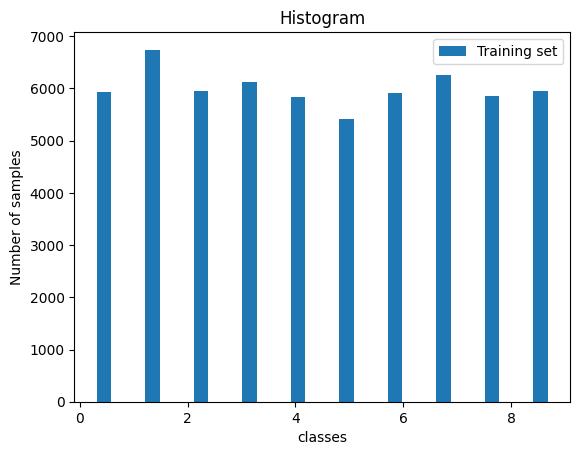

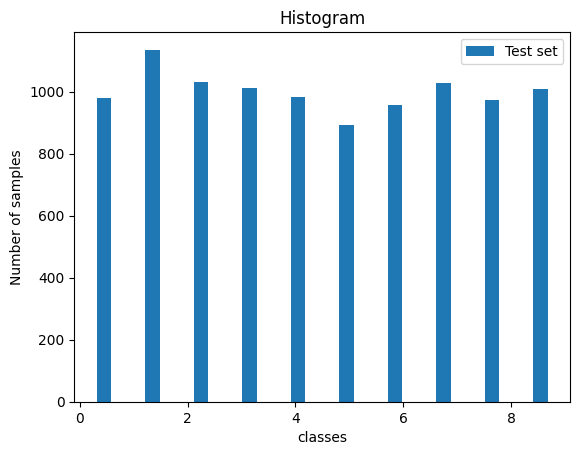

In [5]:
from matplotlib import pyplot as plt

plt.hist(y_train, label="Training set", rwidth=0.3)
plt.title("Histogram")
plt.ylabel("Number of samples")
plt.xlabel("classes")
plt.legend()
plt.show()

plt.hist(y_test, label="Test set", rwidth=0.3)
plt.title("Histogram")
plt.ylabel("Number of samples")
plt.xlabel("classes")
plt.legend()
plt.show()

In [6]:
# Select 2250 Samples from Each Class
import numpy as np

train_selected_indices = []


# Loop over each class label (0 to 9)
for label in range(0, 10):
    # Find the indices of all samples with this label
    train_label_indices = np.where(y_train == label)[0]

    # Randomly select 2250 samples from these indices
    train_selected_label_indices = np.random.choice(
        train_label_indices, size=2250, replace=False
    )

    # Add these indices to the list
    train_selected_indices.extend(train_selected_label_indices)

In [7]:
# Convert Selected Indices to a Numpy Array and Shuffle

# Convert the list to a numpy array
train_selected_indices = np.array(train_selected_indices)

# Shuffle the indices to mix samples from different classes
np.random.shuffle(train_selected_indices)

In [8]:
x_train = x_train[train_selected_indices]
y_train = y_train[train_selected_indices]

print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)

print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (22500, 784)
x_test.shape: (10000, 784)
y_train.shape: (22500,)
y_test.shape: (10000,)


#### Dimensionality reduction

There is a reduction of dimensions with the PCA technique while maintaining 90% of the distribution. The dimension of the data is reduced from 784 to 88.

In [9]:
from sklearn import decomposition

# TODO: Analyze how PCA works with sklearn (the arguments and the return values)
pca = decomposition.PCA(n_components=0.9, svd_solver="full", random_state=0)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

print("x_train_final.shape =", x_train.shape)
print("x_test.shape =", x_test.shape)

x_train_final.shape = (22500, 88)
x_test.shape = (10000, 88)


#### Model evaluation

`grid_search` performs K-fold cross validation & evaluates for various parameter values. 

Accuracy is chosen as the evaluation metric, because the classes are weighted.

`plot_grid_search` generates plots for accuracy and training time. 

`evaluate_model` retrains the best model on the entire training set and evaluates it on the test set.

In [10]:
final_results = []

##### Linear Kernel (C)

$ Loss = \mathbf{w}^T\mathbf{w} + C\sum_{k=1}^R\varepsilon_{k}\ $

Kernel: $ K(\mathbf{x}, \mathbf{x}') = \langle\mathbf{x},\mathbf{x}'\rangle $

In [11]:
from sklearn import svm
from model_training_utils import grid_search


param_dict = {"C": (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0)}

model = svm.SVC(kernel="linear")
results = grid_search(model, param_dict, x_train, y_train)

[1/7] {'C': 0.001}: train_acc = 0.9113, val_acc = 0.9085 | t = 10.4 sec = 0.2 min
[2/7] {'C': 0.005}: train_acc = 0.9292, val_acc = 0.9246 | t = 4.5 sec = 0.1 min
[3/7] {'C': 0.01}: train_acc = 0.9342, val_acc = 0.9281 | t = 3.7 sec = 0.1 min
[4/7] {'C': 0.05}: train_acc = 0.9461, val_acc = 0.9344 | t = 3.2 sec = 0.1 min
[5/7] {'C': 0.1}: train_acc = 0.9497, val_acc = 0.9348 | t = 3.0 sec = 0.0 min
[6/7] {'C': 0.5}: train_acc = 0.9563, val_acc = 0.9325 | t = 4.7 sec = 0.1 min
[7/7] {'C': 1.0}: train_acc = 0.9589, val_acc = 0.9307 | t = 8.7 sec = 0.1 min
Best params = {'C': 0.1}
Maximum validation accuracy = 0.9347999999999999


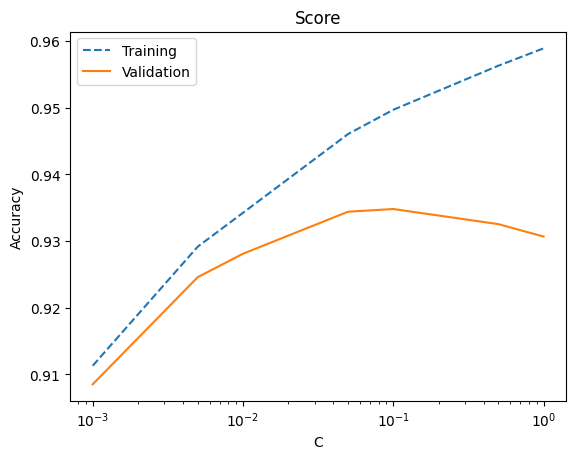

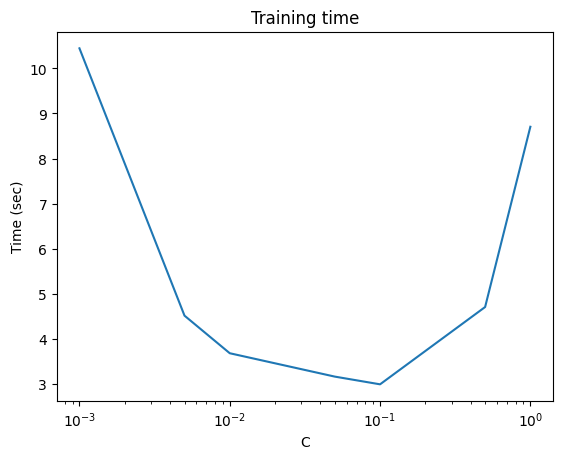

In [12]:
from model_training_utils import plot_grid_search

plot_grid_search(results, "C", None, "log")

In [13]:
from model_training_utils import evaluate_model

res = evaluate_model(
    "Linear SVM",
    model,
    results["best_params"],
    x_train,
    y_train,
    x_test,
    y_test,
)
final_results.append(res)

Training on the original training set with params = {'C': 0.1}
Training time = 7.5 sec = 0.1 min
Training accuracy = 0.9478666666666666
Test accuracy = 0.9403


##### Polynomial Kernel (C, degree)

Kernel: $ K(\mathbf{x}, \mathbf{x}') = (\gamma\langle\mathbf{x},\mathbf{x}'\rangle+r)^d $

In [14]:
from sklearn import svm

param_dict = {"C": (0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0), "degree": (2, 3, 4, 5)}

model = svm.SVC(kernel="poly")
results = grid_search(model, param_dict, x_train, y_train)

[1/28] {'C': 0.001, 'degree': 2}: train_acc = 0.6243, val_acc = 0.6214 | t = 49.6 sec = 0.8 min
[2/28] {'C': 0.001, 'degree': 3}: train_acc = 0.4225, val_acc = 0.4187 | t = 46.0 sec = 0.8 min
[3/28] {'C': 0.001, 'degree': 4}: train_acc = 0.3624, val_acc = 0.3566 | t = 42.7 sec = 0.7 min
[4/28] {'C': 0.001, 'degree': 5}: train_acc = 0.1786, val_acc = 0.1722 | t = 48.3 sec = 0.8 min
[5/28] {'C': 0.01, 'degree': 2}: train_acc = 0.8588, val_acc = 0.8547 | t = 32.9 sec = 0.5 min
[6/28] {'C': 0.01, 'degree': 3}: train_acc = 0.7407, val_acc = 0.7329 | t = 36.6 sec = 0.6 min
[7/28] {'C': 0.01, 'degree': 4}: train_acc = 0.5831, val_acc = 0.5692 | t = 38.1 sec = 0.6 min
[8/28] {'C': 0.01, 'degree': 5}: train_acc = 0.4945, val_acc = 0.4792 | t = 41.4 sec = 0.7 min
[9/28] {'C': 0.1, 'degree': 2}: train_acc = 0.9603, val_acc = 0.9519 | t = 16.9 sec = 0.3 min
[10/28] {'C': 0.1, 'degree': 3}: train_acc = 0.9579, val_acc = 0.9463 | t = 19.6 sec = 0.3 min
[11/28] {'C': 0.1, 'degree': 4}: train_acc = 0.

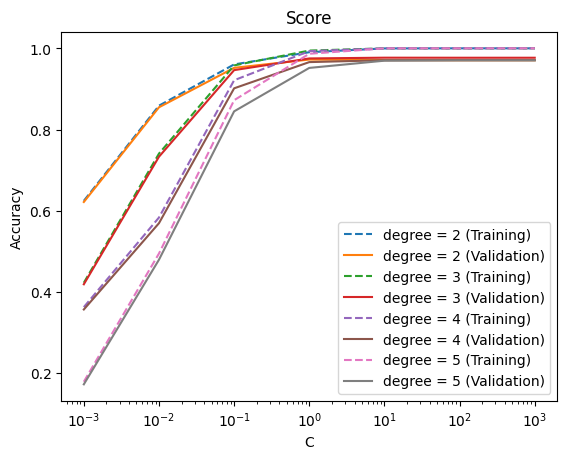

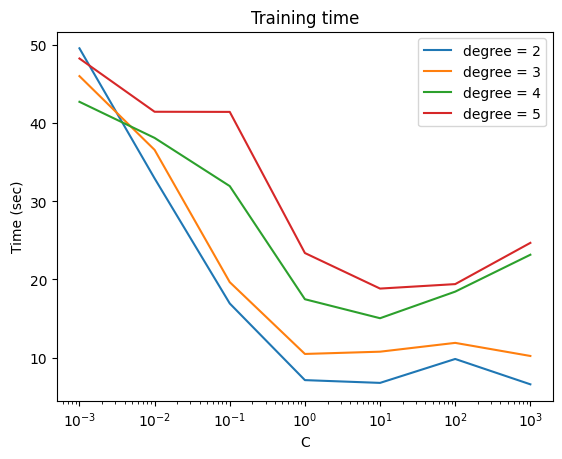

In [15]:
plot_grid_search(results, "C", "degree", "log")

In [16]:
res = evaluate_model(
    "Polynomial SVM",
    model,
    results["best_params"],
    x_train,
    y_train,
    x_test,
    y_test,
)
final_results.append(res)

Training on the original training set with params = {'C': 10.0, 'degree': 3}
Training time = 15.0 sec = 0.2 min
Training accuracy = 0.9999111111111111
Test accuracy = 0.9785


##### RBF Kernel (C, gamma)

Kernel: $ K(\mathbf{x}, \mathbf{x}') = e^{-\gamma||\mathbf{x}-\mathbf{x}'||^2} $

In [17]:
param_dict = {"C": (0.001, 0.01, 0.1, 1.0, 10.0, 100.0), "gamma": (0.01, 0.1, 1.0)}

model = svm.SVC(kernel="rbf")
results = grid_search(model, param_dict, x_train, y_train)

[1/18] {'C': 0.001, 'gamma': 0.01}: train_acc = 0.7964, val_acc = 0.7932 | t = 68.8 sec = 1.1 min
[2/18] {'C': 0.001, 'gamma': 0.1}: train_acc = 0.5373, val_acc = 0.4880 | t = 65.9 sec = 1.1 min
[3/18] {'C': 0.001, 'gamma': 1.0}: train_acc = 0.9127, val_acc = 0.1082 | t = 62.7 sec = 1.0 min
[4/18] {'C': 0.01, 'gamma': 0.01}: train_acc = 0.8692, val_acc = 0.8671 | t = 43.2 sec = 0.7 min
[5/18] {'C': 0.01, 'gamma': 0.1}: train_acc = 0.5508, val_acc = 0.5014 | t = 67.5 sec = 1.1 min
[6/18] {'C': 0.01, 'gamma': 1.0}: train_acc = 0.9127, val_acc = 0.1082 | t = 65.1 sec = 1.1 min
[7/18] {'C': 0.1, 'gamma': 0.01}: train_acc = 0.9388, val_acc = 0.9341 | t = 15.5 sec = 0.3 min
[8/18] {'C': 0.1, 'gamma': 0.1}: train_acc = 0.7870, val_acc = 0.7217 | t = 51.6 sec = 0.9 min
[9/18] {'C': 0.1, 'gamma': 1.0}: train_acc = 0.9127, val_acc = 0.1082 | t = 65.0 sec = 1.1 min
[10/18] {'C': 1.0, 'gamma': 0.01}: train_acc = 0.9772, val_acc = 0.9636 | t = 7.0 sec = 0.1 min
[11/18] {'C': 1.0, 'gamma': 0.1}: tra

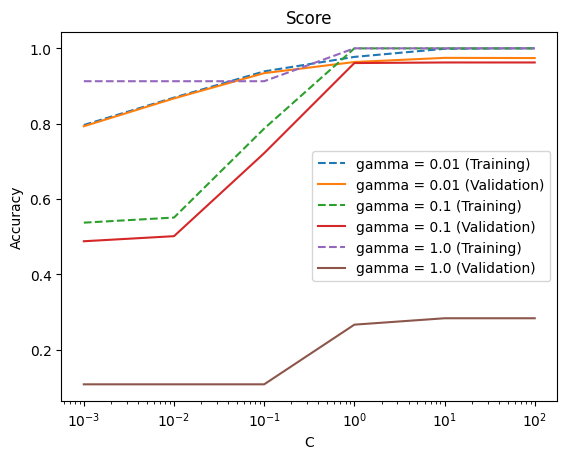

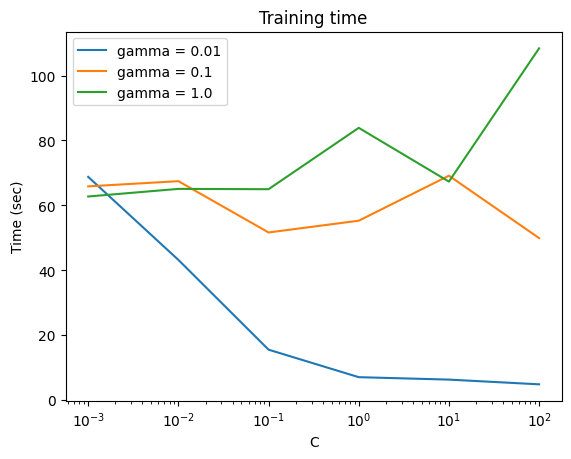

In [18]:
plot_grid_search(results, "C", "gamma", "log")

In [19]:
res = evaluate_model(
    "RBF SVM", model, results["best_params"], x_train, y_train, x_test, y_test
)
final_results.append(res)

Training on the original training set with params = {'C': 10.0, 'gamma': 0.01}
Training time = 9.0 sec = 0.2 min
Training accuracy = 0.9986666666666667
Test accuracy = 0.9778


##### MLP Kernel (C, gamma)

Kernel: $ K(\mathbf{x}, \mathbf{x}') = tanh(\gamma\langle\mathbf{x},\mathbf{x}'\rangle+r) $

In [20]:
param_dict = {"C": (0.001, 0.01, 0.1, 1.0, 10.0, 100.0), "gamma": (0.001, 0.01, 0.1)}

model = svm.SVC(kernel="sigmoid")
results = grid_search(model, param_dict, x_train, y_train)

[1/18] {'C': 0.001, 'gamma': 0.001}: train_acc = 0.6728, val_acc = 0.6726 | t = 90.9 sec = 1.5 min
[2/18] {'C': 0.001, 'gamma': 0.01}: train_acc = 0.6770, val_acc = 0.6761 | t = 76.6 sec = 1.3 min
[3/18] {'C': 0.001, 'gamma': 0.1}: train_acc = 0.6900, val_acc = 0.6901 | t = 69.9 sec = 1.2 min
[4/18] {'C': 0.01, 'gamma': 0.001}: train_acc = 0.6728, val_acc = 0.6726 | t = 74.3 sec = 1.2 min
[5/18] {'C': 0.01, 'gamma': 0.01}: train_acc = 0.8402, val_acc = 0.8392 | t = 41.6 sec = 0.7 min
[6/18] {'C': 0.01, 'gamma': 0.1}: train_acc = 0.6313, val_acc = 0.6338 | t = 19.4 sec = 0.3 min
[7/18] {'C': 0.1, 'gamma': 0.001}: train_acc = 0.8435, val_acc = 0.8423 | t = 18.7 sec = 0.3 min
[8/18] {'C': 0.1, 'gamma': 0.01}: train_acc = 0.9068, val_acc = 0.9036 | t = 6.5 sec = 0.1 min
[9/18] {'C': 0.1, 'gamma': 0.1}: train_acc = 0.4869, val_acc = 0.4966 | t = 8.5 sec = 0.1 min
[10/18] {'C': 1.0, 'gamma': 0.001}: train_acc = 0.9112, val_acc = 0.9085 | t = 6.8 sec = 0.1 min
[11/18] {'C': 1.0, 'gamma': 0.01

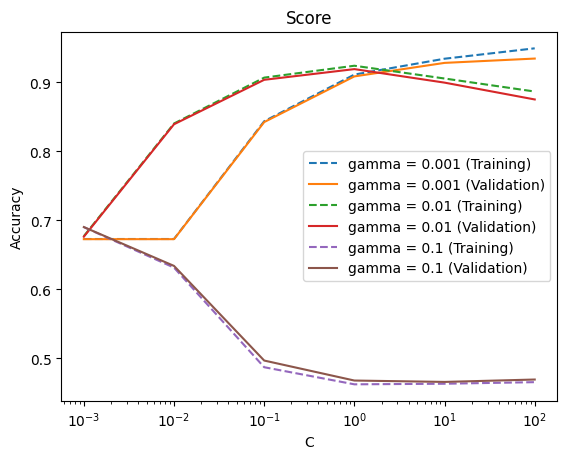

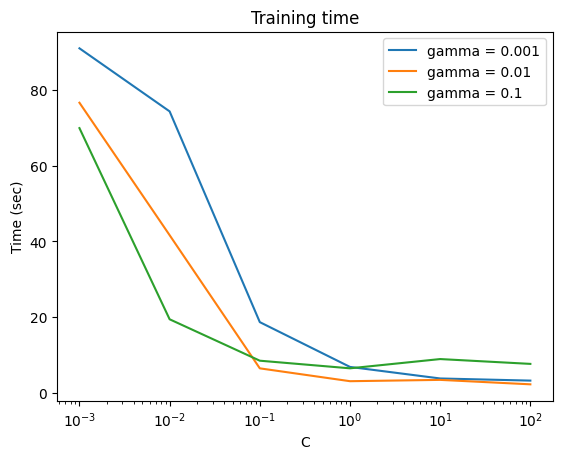

In [21]:
plot_grid_search(results, "C", "gamma", "log")

In [22]:
res = evaluate_model(
    "Sigmoid SVM",
    model,
    results["best_params"],
    x_train,
    y_train,
    x_test,
    y_test,
)
final_results.append(res)

Training on the original training set with params = {'C': 100.0, 'gamma': 0.001}
Training time = 4.3 sec = 0.1 min
Training accuracy = 0.9476888888888889
Test accuracy = 0.9401


##### Nearest Neighbors

$d_p(\mathbf{x}, \mathbf{y}) = \sqrt[p]{\sum_{i}|x_i-y_i|^p}$

In [23]:
from sklearn import neighbors

param_dict = {"n_neighbors": (1, 2, 5, 10), "p": (1, 2, 3)}

model = neighbors.KNeighborsClassifier()
results = grid_search(model, param_dict, x_train, y_train)

[1/12] {'n_neighbors': 1, 'p': 1}: train_acc = 1.0000, val_acc = 0.9572 | t = 0.0 sec = 0.0 min
[2/12] {'n_neighbors': 1, 'p': 2}: train_acc = 1.0000, val_acc = 0.9632 | t = 0.0 sec = 0.0 min
[3/12] {'n_neighbors': 1, 'p': 3}: train_acc = 1.0000, val_acc = 0.9642 | t = 0.0 sec = 0.0 min
[4/12] {'n_neighbors': 2, 'p': 1}: train_acc = 0.9768, val_acc = 0.9483 | t = 0.0 sec = 0.0 min
[5/12] {'n_neighbors': 2, 'p': 2}: train_acc = 0.9814, val_acc = 0.9559 | t = 0.0 sec = 0.0 min
[6/12] {'n_neighbors': 2, 'p': 3}: train_acc = 0.9825, val_acc = 0.9569 | t = 0.0 sec = 0.0 min
[7/12] {'n_neighbors': 5, 'p': 1}: train_acc = 0.9721, val_acc = 0.9566 | t = 0.0 sec = 0.0 min
[8/12] {'n_neighbors': 5, 'p': 2}: train_acc = 0.9769, val_acc = 0.9644 | t = 0.0 sec = 0.0 min
[9/12] {'n_neighbors': 5, 'p': 3}: train_acc = 0.9771, val_acc = 0.9643 | t = 0.0 sec = 0.0 min
[10/12] {'n_neighbors': 10, 'p': 1}: train_acc = 0.9611, val_acc = 0.9517 | t = 0.0 sec = 0.0 min
[11/12] {'n_neighbors': 10, 'p': 2}: t

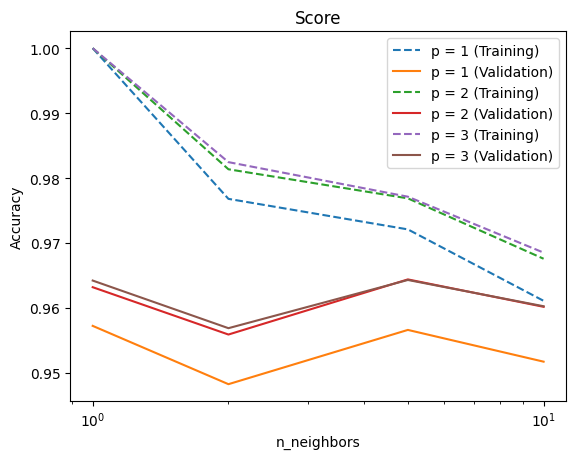

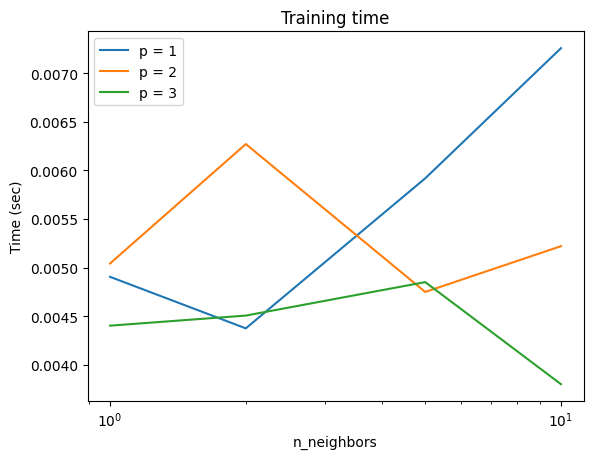

In [24]:
plot_grid_search(results, "n_neighbors", "p", "log")

In [25]:
res = evaluate_model(
    "Nearest Neighbors",
    model,
    results["best_params"],
    x_train,
    y_train,
    x_test,
    y_test,
)
final_results.append(res)

Training on the original training set with params = {'n_neighbors': 5, 'p': 2}
Training time = 0.0 sec = 0.0 min
Training accuracy = 0.9787111111111111
Test accuracy = 0.9654


##### Nearest Class Centroid

In [26]:
param_dict = {"shrink_threshold": (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)}

model = neighbors.NearestCentroid()
results = grid_search(model, param_dict, x_train, y_train)

[1/10] {'shrink_threshold': 0.1}: train_acc = 0.8037, val_acc = 0.8025 | t = 0.0 sec = 0.0 min
[2/10] {'shrink_threshold': 0.2}: train_acc = 0.8033, val_acc = 0.8027 | t = 0.1 sec = 0.0 min
[3/10] {'shrink_threshold': 0.3}: train_acc = 0.8029, val_acc = 0.8025 | t = 0.0 sec = 0.0 min
[4/10] {'shrink_threshold': 0.4}: train_acc = 0.8025, val_acc = 0.8018 | t = 0.0 sec = 0.0 min
[5/10] {'shrink_threshold': 0.5}: train_acc = 0.8020, val_acc = 0.8010 | t = 0.0 sec = 0.0 min
[6/10] {'shrink_threshold': 0.6}: train_acc = 0.8017, val_acc = 0.8005 | t = 0.0 sec = 0.0 min
[7/10] {'shrink_threshold': 0.7}: train_acc = 0.8013, val_acc = 0.8000 | t = 0.0 sec = 0.0 min
[8/10] {'shrink_threshold': 0.8}: train_acc = 0.8008, val_acc = 0.7993 | t = 0.1 sec = 0.0 min
[9/10] {'shrink_threshold': 0.9}: train_acc = 0.8002, val_acc = 0.7988 | t = 0.0 sec = 0.0 min
[10/10] {'shrink_threshold': 1.0}: train_acc = 0.7997, val_acc = 0.7984 | t = 0.0 sec = 0.0 min
Best params = {'shrink_threshold': 0.2}
Maximum v

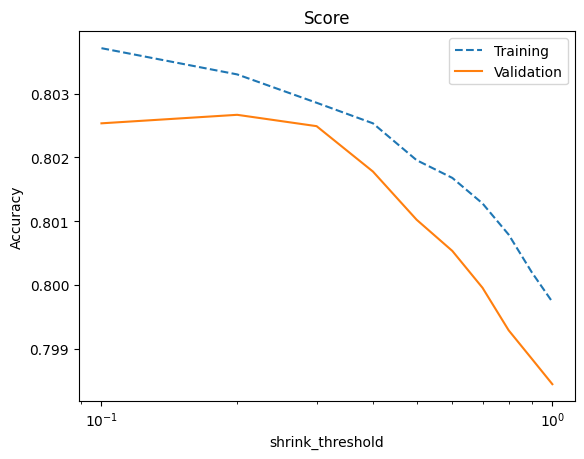

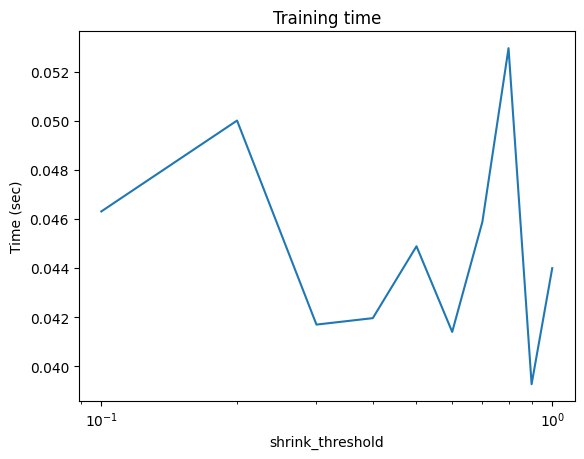

In [27]:
plot_grid_search(results, "shrink_threshold", None, "log")

In [28]:
res = evaluate_model(
    "Nearest Class Centroid",
    model,
    results["best_params"],
    x_train,
    y_train,
    x_test,
    y_test,
)
final_results.append(res)

Training on the original training set with params = {'shrink_threshold': 0.2}
Training time = 0.1 sec = 0.0 min
Training accuracy = 0.8034666666666667
Test accuracy = 0.8178


##### Results summary

In [29]:
import pandas as pd

final_results_df = pd.DataFrame(final_results)
print(final_results_df)

               Classifier                    Parameters Training Accuracy  \
0              Linear SVM                    C = 0.1000            0.9479   
1          Polynomial SVM       C = 10.0000, degree = 3            0.9999   
2                 RBF SVM   C = 10.0000, gamma = 0.0100            0.9987   
3             Sigmoid SVM  C = 100.0000, gamma = 0.0010            0.9477   
4       Nearest Neighbors        n_neighbors = 5, p = 2            0.9787   
5  Nearest Class Centroid     shrink_threshold = 0.2000            0.8035   

  Test Accuracy Training Time (sec)  
0        0.9403                 7.5  
1        0.9785                15.0  
2        0.9778                 9.0  
3        0.9401                 4.3  
4        0.9654                 0.0  
5        0.8178                 0.1  
